In [1]:
import numpy as np
import os
import matplotlib as plt

## Get cell traces

In [195]:
# ### Extracting video tif files for Carmen ###
# import os
# import shutil

# source_folder = 'C:/Users/huynh/temp_local/carmen_december_gad/csms-10262023-000'
# destination_folder = 'C:/Users/huynh/temp_local/carmen_december_gad/csms-10262023-000_copy'

# files = os.listdir(source_folder)
# selected_files = files[::2]  # Select every other file

# for file_name in selected_files:
#     source_path = os.path.join(source_folder, file_name)
#     destination_path = os.path.join(destination_folder, file_name)
#     shutil.move(source_path, destination_path)

# print(f"Selected files moved from {source_folder} to {destination_folder}")

Selected files moved from C:/Users/huynh/temp_local/carmen_december_gad/csms-10262023-000 to C:/Users/huynh/temp_local/carmen_december_gad/csms-10262023-000_copy


In [52]:
#### GET TRACES ####

# folder_path = "C:/Users/huynh/temp_local/carmen_october/TSeries-10192023-000/suite2p_231011_231019_Plane0"
# folder_path = "C:/Users/huynh/temp_local/carmen_december_gad/TSeries-10272023-000/suite2p" # .3 Tau, cells reviewed and behavior annotated by Carmen 
folder_path = "C:/Users/huynh/temp_local/carmen_december_gad/TSeries-10272023-000_extras/suite2p_tau_cyto/plane0" # .1 Tau, Cyto -- Not much better than .5 tau.  GOOD ONE
# folder_path =  "C:/Users/huynh/temp_local/mirindra_december/220217_a000/suite2p_220209_220217_220217_a000" 
# folder_path =  "C:/Users/huynh/temp_local/carmen_december_gad/TSeries-10262023-000/suite2p_tau_cyto/plane0" 
# folder_path =  "C:/Users/huynh/temp_local/mirindra/220208_a001/220208_a001/suite2p_220202_220208_220208_a001" # 157 cells with spks activity but zero F activity (and 0 nan)
# folder_path =  "C:/Users/huynh/temp_local/mirindra/220208_a001/220208_a001/ci_data_220202_220208_220208_a001/phan/suite2p/plane0" # 253 cells with spks activity but zero F activity (and 0 nan)
# folder_path =  "C:/Users/huynh/temp_local/robin/from_poster/220506_220516/220516_a000/suite2p_220506_220516_220516_a000" # 22 cells with spks activity but zero F activity (and 0 nan)
# folder_path = "C:/Users/huynh/temp_local/mirindra_gcamp8/220220_220305/220305_a000/suite2p_220220_220305_220305_a000" # gcamp8 from mirindra, annotated by Carmen.   
# folder_path = "C:/Users/huynh/temp_local/mirindra_gcamp8/220220_220305/220305_a000/ci_data_220220_220305_220305_a000/suite2p_297cells_dia0_cellp0_tau1_modelCP_overlap75/plane0" # gcamp8 from mirindra, Suite2p denoise parameter changed to 1 (like carmen's) causing cells to go from 900 to 300.      
# folder_path = "C:/Users/huynh/temp_local/caro_gcamp8/suite2p_combined/plane0" # gcamp8 from Caro      
# folder_path = "C:/Users/huynh/temp_local/caro_gcamp8/suite2p_/plane0" # gcamp8 from Caro      



imaging_sampling_rate = 10.31476027 # For carmen (2 planes on Bruker), basically same as Caro's (10.31475985). taken from XML
# imaging_sampling_rate = 7.973153140560112 # for Mirindra and Robin, taken from Cicada outputs.   

F = np.load(os.path.join(folder_path, "F.npy"))
iscell = np.load(os.path.join(folder_path, 'iscell.npy'))
stat = np.load(os.path.join(folder_path, 'stat.npy'), allow_pickle=True)
spks = np.load(os.path.join(folder_path, 'spks.npy'), allow_pickle=True)
ops = np.load(os.path.join(folder_path, 'ops.npy'), allow_pickle=True)


print("F: ", F.shape)
F.shape[1]/2

# frame_cutoff = 8000 # for carmen_december_p10_gad only, because of de-coloration at the end
frame_cutoff = int(F.shape[1]/2) # for carmen_december_p11_gad only

traces = F[iscell[:,0]==1,:frame_cutoff] # Confirmed in Cicada

# traces = F with only cells that are classified as cells by suite2p
# traces = F[iscell[:,0]==1,:] # Confirmed in Cicada

print("traces: ", traces.shape)

# Normalize traces
from scipy import signal, stats

n_cells, n_frames = traces.shape
print("n_cells: ", n_cells)
print("n_frames: ", n_frames)
print("seconds: ", n_frames/imaging_sampling_rate)
print("minutes: ", n_frames/imaging_sampling_rate/60)


F:  (581, 12346)
traces:  (419, 6173)
n_cells:  419
n_frames:  6173
seconds:  598.4627697023539
minutes:  9.974379495039232


In [3]:
### Check for zeros and nans in traces (and F) - relevant for older microscope, which causes a lot of zero traces ####

import matplotlib.pyplot as plt


traces_var = []
traces_var_zero_count = 0
traces_var_nan_count = 0
traces_var_zero_spks_var_notzero = 0
index_traces_var_nonzero = []

for i in range(n_cells):
    traces_var.append(np.var(traces[i]))
    if np.var(traces[i]) == 0 and np.var(spks[i]) > 0:
        traces_var_zero_spks_var_notzero += 1
    if np.var(traces[i]) == 0:
        traces_var_zero_count += 1
    if np.var(traces[i]) != 0:
        index_traces_var_nonzero.append(i)
    if np.any(np.isnan(traces[i])):
        traces_var_nan_count += 1

print("traces with zero variance: ", traces_var_zero_count)
print("traces with nan: ", traces_var_nan_count)
print("traces with zero variance and no spks: ", traces_var_zero_spks_var_notzero)

# plot histogram of traces_var

# plt.hist(traces_var, bins=10000)
# plt.show() 

F_var = []
F_var_zero_count = 0
F_var_nan_count = 0
F_var_zero_spks_var_notzero = 0
for i in range(n_cells):
    F_var.append(np.var(F[i]))
    if np.var(F[i]) == 0 and np.var(spks[i]) > 0:
        F_var_zero_spks_var_notzero += 1
    if np.var(F[i]) == 0:
        F_var_zero_count += 1
    if np.any(np.isnan(F[i])):
        F_var_nan_count += 1

# print(F_var_zero_count)
# print(F_var_nan_count)
# print(F_var_zero_spks_var_notzero)

# plot histogram of F_var

# plt.hist(F_var, bins=100)
# plt.show()    

traces with zero variance:  0
traces with nan:  0
traces with zero variance and no spks:  0


In [121]:
### remove zeros from traces
traces = traces[index_traces_var_nonzero]
n_cells, n_frames = traces.shape


In [213]:
## OPTION 2:  Getting neuronal data from Mirindra's CICADA pipeline because neuronal_data doesn't match suite2p's F data.
## From JC:  sometimes Suite2p has a bug where it zeros out raw traces (F). 
## However, Cicada produces it's on traces that should be very similar to suite2p's F. 
## it should be save to use that instead.  
 
neuronal_data = np.load("C:/Users/huynh/temp_local/mirindra_december/debug/neuronal_data.npy", allow_pickle=True)
traces = neuronal_data

n_cells, n_frames = traces.shape
print("n_cells: ", n_cells)
print("n_frames: ", n_frames)
print("seconds: ", n_frames/imaging_sampling_rate)
print("minutes: ", n_frames/imaging_sampling_rate/60)

## to check out later:  somehow Mirinda and RObin are able to deselect cells (their ncells is always lower than the number from stat.npy).   

n_cells:  403
n_frames:  15000
seconds:  1881.3134196173553
minutes:  31.355223660289255


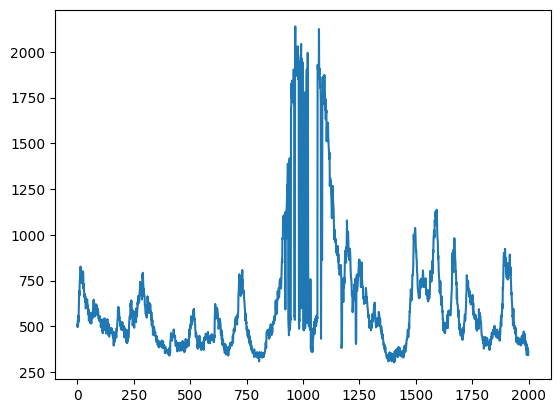

In [179]:
# plot neuronal data[n:m] sumperimposed
n=0
m=5
range_end=2000
plt.plot(neuronal_data[n][:range_end])
plt.show()


## Get behavior annotations

In [202]:
# #### GET EPOCH FRAMES FROM FIJI (without text file) #### 

# # movements_frame = [994,1449, 2706, 2766,3273, 3415,3841,4083,5315,6237,6350,6827,7992,8205,8411,8662,8961,9087,10511,12184,12236] # For carmen_december_gad/TSeries-10272023-000/suite2p/plane0, done by Phan on Fiji

# movements_frame = np.array(movements_frame)
# print(type(movements_frame))
# print(len(movements_frame))
# print(movements_frame)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3760643988.py, line 5)

In [17]:
#### GET EPOCH FRAMES, from Text file #### ((Manual process:  Using Fiji to play recording, we note behavior timestamps in a text file and import to here)

beh_folder_path = "C:/Users/huynh/temp_local/carmen_december_gad/TSeries-10272023-000_extras" 
count_twitches = 33 # get these 3 values from the shared google sheet
count_startles = 4
count_complex = 13


# beh_folder_path = "C:/Users/huynh/temp_local/caro_gcamp8/" 
# count_twitches = 8 # get these 3 values from the shared google sheet
# count_startles = 7
# count_complex = 49

beh_file = (os.path.join(beh_folder_path, 'beh_anno.txt'))


with open(beh_file, 'r') as file:
    # Read lines and remove leading/trailing whitespaces
    movements_frame = [line.strip() for line in file.readlines()]
    # convert movements_frame to int
    movements_frame = [int(item) for item in movements_frame]# for i in range(len(movements_frame)):

twitches = movements_frame[0:count_twitches]
print("twitches: ", len(twitches)," ", twitches)
startles = movements_frame[count_twitches:count_twitches+count_startles]
print("startles: ",  len(startles)," ", startles)
complex = movements_frame[-count_complex:]
print("complex: ", len(complex)," ", complex)

movements_frame = twitches + startles + complex
print("total movements: ", len(movements_frame))

twitches:  33   [171, 537, 771, 843, 870, 975, 985, 2705, 3092, 3508, 3587, 3756, 4636, 4791, 4823, 4913, 5494, 5710, 6463, 6616, 6658, 7826, 7904, 8607, 8873, 9487, 9850, 9901, 10775, 11052, 11251, 11498, 12296]
startles:  4   [2752, 2919, 3273, 7677]
complex:  13   [994, 1445, 3406, 3837, 4044, 5310, 6087, 6801, 7390, 8663, 9080, 10508, 12230]
total movements:  50


In [23]:
#### GET EPOCH FRAMES, from Text file #### ((Manual process:  Using Fiji to play recording, we note behavior timestamps in a text file and import to here)
#### VERSION 2:  TESTING half behavior

beh_folder_path = "C:/Users/huynh/temp_local/carmen_december_gad/TSeries-10272023-000_extras" 
count_twitches = 33 # get these 3 values from the shared google sheet
count_startles = 4
count_complex = 13


# beh_folder_path = "C:/Users/huynh/temp_local/caro_gcamp8/" 
# count_twitches = 8 # get these 3 values from the shared google sheet
# count_startles = 7
# count_complex = 49

beh_file = (os.path.join(beh_folder_path, 'beh_anno.txt'))


with open(beh_file, 'r') as file:
    # Read lines and remove leading/trailing whitespaces
    movements_frame = [line.strip() for line in file.readlines()]
    # convert movements_frame to int
    movements_frame = [int(float(item) * 0.5) for item in movements_frame]
    # movements_frame = [int(item) for item in movements_frame]# for i in range(len(movements_frame)):

twitches = movements_frame[0:count_twitches]
print("twitches: ", len(twitches)," ", twitches)
startles = movements_frame[count_twitches:count_twitches+count_startles]
print("startles: ",  len(startles)," ", startles)
complex = movements_frame[-count_complex:]
print("complex: ", len(complex)," ", complex)

movements_frame = twitches + startles + complex
print("total movements: ", len(movements_frame))

twitches:  33   [85, 268, 385, 421, 435, 487, 492, 1352, 1546, 1754, 1793, 1878, 2318, 2395, 2411, 2456, 2747, 2855, 3231, 3308, 3329, 3913, 3952, 4303, 4436, 4743, 4925, 4950, 5387, 5526, 5625, 5749, 6148]
startles:  4   [1376, 1459, 1636, 3838]
complex:  13   [497, 722, 1703, 1918, 2022, 2655, 3043, 3400, 3695, 4331, 4540, 5254, 6115]
total movements:  50


In [82]:
## GET EPOCH TIMES FROM epochs_frames_in_group #### (use this method if CI recording was done on old microscope.  Because 
# the CI and beh video frames are not perfectly synced, we need to rely on cicada (which looks at the npz from badass gui) 
# to determine the frames (instead of just multiplying by image rate))

from numpy import load

# data = load('C:/Users/huynh/temp_local/robin/from_poster/220506_220516/220516_a000/behavior_220506_220516_220516_a000/220506_220516_220516_a000_cicada_behavior.npz')
data = np.load('C:/Users/huynh/temp_local/mirindra_gcamp8/220220_220305/debug/epochs_frames_in_group.npy')

# get first number in each array of data

movements_frame = data[:,0]
len(movements_frame)


27

In [61]:
## GET EPOCH TIMES FROM NPZ #### (In cicada, it takes in timestamps in seconds (probably from NPZ) and converts to frames 
# (it imports time in seconds then converts to frames).  So frames is probably a little different from my calculation)

from numpy import load

# data = load('C:/Users/huynh/temp_local/robin/from_poster/220506_220516/220516_a000/behavior_220506_220516_220516_a000/220506_220516_220516_a000_cicada_behavior.npz')
data = load('C:/Users/huynh/temp_local/mirindra_gcamp8/220220_220305/220305_a000/behavior_220220_220305_220305_a000/p13_220220_220305_220305_a000_cicada_behavior_description.npz',allow_pickle=True)

data_types = data.files #['Twitches', 'Startles', 'Complex_Movements']
print("data_types before: ", data_types)
# data_types = data_types[:-1] # remove MotCorr Auto Detection
# print("data_types after: ", data_types)

movement_types_all = ['Twitches', 'Startles', 'Complex_Movements'] # remove MotCorr Auto Detection
movement_types_no_complex = ['Twitches', 'Startles']

twitches = (data['Twitches'][0]*imaging_sampling_rate).astype(int)
startles = (data['Startles'][0]*imaging_sampling_rate).astype(int)
complex = (data['Complex_Movements'][0]*imaging_sampling_rate).astype(int)

lst = movement_types_all # movement_types_no_complex
for item in lst:
    print(item)
    print(data[item][0])
    # print((data[item][0]*imaging_sampling_rate).astype(int))
    # movements = np.concatenate((movements, data[item][0]))
print("")

movements_frame = []
movements_sec = []
for item in lst:
    sec_temp = data[item][0]
    movements_sec.extend(sec_temp)
    
    frame_temp = (data[item][0]*imaging_sampling_rate).astype(int)
    movements_frame.extend(frame_temp)
    # movement_frames = np.concatenate(movement_frames, frame_temp)

#Convert to frames
movements_sec = np.array(movements_sec)
movements_frame = np.array(movements_frame, dtype=np.int32)

# movements = np.sort(movements)
print("")

print(len(movements_frame))
# print(type(movements_sec))
# print(movements_sec)
# print(np.sort(movements_frame))

data_types before:  ['Twitches', 'Startles', 'Complex_Movements']
Twitches
[ 452.98970761  580.48970761 1256.54631211 1509.74541117 1640.12995462
 1740.67260051]
Startles
[ 354.70044262  362.20044262  399.20044262  752.89631211  941.39631211
  987.14631211 1137.14631211 1199.54631211 1269.74631211 1649.42995462
 1872.97260051 1908.67260051]
Complex_Movements
[1122.54631211 1376.36851807 1419.86851807 1484.96851807 1702.87260051
 1773.67260051 1806.67260051 1845.37260051 1946.77260051]


27


In [211]:
# ### Get beh from Mirindra's cicada pipeline ###
# epochs_frames_in_group = np.load("C:/Users/huynh/temp_local/mirindra_december/debug/epochs_frames_in_group.npy", allow_pickle=True)
# movements_frame = []
# for i in range(len(epochs_frames_in_group)):
#     movements_frame.append(epochs_frames_in_group[i][0])

# movements_frame

# count_complex = 52
# count_startles = 13
# count_twitches = 18 # get these 3 values from Cicada psth log 


# complex = movements_frame[0:count_complex]
# print("complex: ", len(complex)," ", complex)
# startles = movements_frame[count_complex:count_complex+count_startles]
# print("startles: ",  len(startles)," ", startles)
# twitches = movements_frame[-count_twitches:]
# print("twitches: ", len(twitches)," ", twitches)


complex:  52   [899, 2918, 3328, 3877, 4037, 5093, 5673, 5818, 6027, 6725, 6849, 6929, 7271, 7483, 7561, 8196, 8306, 8394, 8593, 8741, 8805, 9114, 9437, 9574, 10161, 10262, 10306, 10377, 10799, 11021, 11072, 11185, 11496, 11725, 12136, 12263, 12320, 12391, 12508, 12895, 13063, 13181, 13468, 13573, 13663, 13712, 13777, 14369, 14481, 14625, 14733, 14895]
startles:  13   [6996, 7767, 8237, 8476, 8999, 9693, 11953, 12618, 13125, 13827, 13915, 14026, 14130]
twitches:  18   [2306, 7003, 7218, 7261, 7322, 8014, 8022, 8022, 10574, 11396, 12043, 12839, 12895, 13025, 13777, 14576, 14856, 14994]


## Get motion correction data from Suite2p

In [57]:
corrXY = ops.item()["corrXY"]
corrXY = np.gradient(corrXY)

threshold_std = 3 

corrXY_filtered = np.where(np.abs(corrXY) < threshold_std * np.std(corrXY), 0, corrXY)

#apply frame cut off:
corrXY_filtered = corrXY_filtered[:frame_cutoff]
corrXY_max = np.max(corrXY_filtered) # used for plotting later

In [ ]:
# Plot mot correction, before and after filter
import numpy as np
import plotly.graph_objects as go

corrXY_raw = ops.item()["corrXY"]
# Create a Plotly figure for the original signal
fig = go.Figure()

# Add a trace for the original signal
fig.add_trace(go.Scatter(y=corrXY_filtered, mode='lines', name='filtered'))

# Add a trace for the superimposed plot
fig.add_trace(go.Scatter(y=corrXY_raw, mode='lines', name='original'))

# Update layout
fig.update_layout(
    title='Motion correction from Suite2p',
    xaxis_title='frame',
    yaxis_title='Amplitude',
    showlegend=True
)

# Show the plot
fig.show()


## Make Heatmap ###

In [58]:
# Try different normalization methods to make rasterplot more visible
#z-score traces
from scipy import stats
traces_zscore = stats.zscore(traces, axis=1)
zmin = np.percentile(traces_zscore, 1)  # Adjust percentile as needed
zmax = np.percentile(traces_zscore, 99)  # Adjust percentile as needed
print(zmin, '', zmax)

# min max normalize traces at each row
traces_min = np.min(traces, axis=1)
traces_max = np.max(traces, axis=1)
traces_minmax = (traces - traces_min[:, np.newaxis]) / (traces_max - traces_min)[:, np.newaxis]

# #plot histogram of traces_zscore
# plt.figure(figsize=(20,10))
# plt.hist(traces_zscore.flatten(), bins=100)
# plt.show()

-1.6938447952270508  3.409679183959967


In [59]:
#### RE ORDER CELLS IN RASTER USING 1) TSNE and then 2) RASTERMAP #####

from sklearn.manifold import TSNE
import numpy as np

# Assuming Tr1b is your data, replace it with your actual data
Tr1b = traces_minmax

# Set TSNE parameters:  based on what Jure and SOphia use.  
tsne = TSNE(
    n_components=1, # how many dimensions to reduce to, 1 is just a list, 2 for 2D, 3 for 3D, etc.
    # n_iter=250, #n_iter is used by JC but not by Jure
    perplexity=30, #Perplexity can be thought of as a smooth measure of the effective number of neighbors for each data point. range from 5 to 50
    init = "pca", 
    # early_exaggeration=10, #a hyperparameter that controls the tightness of the natural clusters in the low-dimensional space.range of 2 to 50
    metric="euclidean", # JC uses correlation in Matlab
    # method="barnes_hut",
    n_jobs = 8,
    random_state=42  # Set a random state for reproducibility
)

# Fit TSNE and get the transformed data
TSNE_result = tsne.fit_transform(Tr1b)

# Get sorted indices
tsne_index = np.argsort(TSNE_result[:, 0])

# Sort the TSNE result based on the sorted indices
B = TSNE_result[tsne_index]

### TRYING RASTERMAP ###

from rastermap import Rastermap, utils
from scipy.stats import zscore

# spks is neurons by time
spks = zscore(spks, axis=1)

# fit rastermap
# model = Rastermap(n_PCs=200, n_clusters=100, 
#                   locality=0.75, time_lag_window=5).fit(spks)

model = Rastermap().fit(traces_minmax)

y = model.embedding # neurons x 1
isort = model.isort

# bin over neurons
X_embedding = zscore(utils.bin1d(spks[isort], bin_size=25, axis=0), axis=1)

# plot
# fig = plt.figure(figsize=(12,5))
# ax = fig.add_subplot(111)
# ax.imshow(X_embedding, vmin=0, vmax=1.5, cmap="gray_r", aspect="auto")

normalizing data across axis=1
projecting out mean along axis=0
data normalized, 0.03sec
sorting activity: 419 valid samples by 6173 timepoints
n_PCs = 200 computed, 0.35sec
94 clusters computed, time 0.48sec


c:\Users\huynh\AppData\Local\anaconda3\envs\jl\Lib\site-packages\rastermap\cluster.py:139: UserWarning:

found fewer than half the n_clusters that the user specified, rerunning with random initialization

c:\Users\huynh\AppData\Local\anaconda3\envs\jl\Lib\site-packages\rastermap\cluster.py:149: UserWarning:

found fewer clusters than user specified, try reducing n_clusters and/or reduce n_splits and/or increase n_PCs



clusters sorted, time 11.94sec
clusters upsampled, time 12.07sec
rastermap complete, time 12.08sec


In [ ]:
# COMPARE ORGINAL ORDERING TO TSNE AND RASTERMAP ####
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

traces_plot = traces_minmax  # traces_zscore # traces_minmax

# Assuming you have a list of arrays named 'list_of_arrays'
# Replace it with your actual data
list_of_arrays = [traces_plot, traces_plot[tsne_index], traces_plot[isort]]  # Replace 'third_array' with your actual third array
# Create a figure with subplots
fig, axes = plt.subplots(1, len(list_of_arrays), figsize=(15, 5))

# Plot each heatmap on a separate subplot
for i, array in enumerate(list_of_arrays):
    sns.heatmap(array, cmap='gray', annot=False, cbar=False, ax=axes[i])
    axes[i].set_title(f'Original' if i == 0 else f'TSNE' if i == 1 else 'RASTERMAP')  # Adjust title accordingly
    if i > 0:  # Remove y-axis for the 2nd and 3rd plots
        axes[i].set_yticks([])
        axes[i].set_yticklabels([])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

save_to_html = False # check folder path 
plot_traces = traces_zscore # traces_minmax # traces_zscore
order = tsne_index # isort # tsne_index

# plot trace average.  
traces_sum = np.sum(traces, axis=0)
traces_avg = traces_sum / n_cells
traces_line = traces_avg # for plotting
traces_line = (traces_line - np.min(traces_line))*2
# Assuming traces_minmax, index, movements, imaging_sampling_rate, traces, and sce_loc are your data arrays

# Create a heatmap
heatmap_trace = go.Heatmap(
    z=plot_traces[order],
    colorscale='gray',
    showscale=False,
    name='Heatmap',  # Name for the legend
    zmin=zmin,  # Set a suitable minimum value for the colormap
    zmax=zmax,   # Set a suitable maximum value for the colormap
)

# Mark behavior
scatter_twitches = go.Scatter(
    x=twitches,
    y=[0] * len(movements_frame),
    mode='markers',
    marker=dict(color='red', symbol='triangle-up', size=10),
    name='twitches',  # Name for the legend
)

# Mark startles
scatter_startles = go.Scatter(
    x=startles,
    y=[0] * len(movements_frame),
    mode='markers',
    marker=dict(color='yellow', symbol='triangle-up', size=10),
    name='startles',  # Name for the legend
)

# Mark complex movements
scatter_complex = go.Scatter(
    x=complex,
    y=[0] * len(movements_frame),
    mode='markers',
    marker=dict(color='green', symbol='triangle-up', size=10),
    name='complex',  # Name for the legend
)

line_trace = go.Scatter(
    x=np.arange(len(traces_line)),
    y=traces_line,
    mode='lines',
    line=dict(color='yellow', width=2),  # Set line color and width
    name='traces_avg',  # Name for the legend
)

# Line trace for corrXY_filtered 
corrXY_filtered_trace = go.Scatter(
    x=np.arange(len(corrXY_filtered)),
    y=np.abs(corrXY_filtered*(n_cells*.2/corrXY_max)),
    mode='lines',
    line=dict(color='orange', width=1),  # Set line color and width
    name='motion corr',  # Name for the legend
)

# Create layout with aspect ratio adjustment
layout = go.Layout(
    title='Cell activity with behavior annotation and motion correction',
    xaxis=dict(title='Time (frame)'),
    yaxis=dict(title='Cell ID'),
    height=700,  # Set the height of the plot
    width=1300,  # Set the width of the plot
)

# Create figure with adjusted legend order
fig = go.Figure(data=[heatmap_trace, line_trace, corrXY_filtered_trace, scatter_twitches, scatter_startles, scatter_complex], layout=layout)

# Show the plot
fig.show()

if save_to_html:
    # fig.write_html("C:/Users/huynh/temp_local/mirindra_december/mirindra_december_10272023.html")
    fig.write_html("C:/Users/huynh/temp_local/carmen_december_gad/carmen_gad_december_10272023v3.html")
    # fig.write_html("C:/Users/huynh/temp_local/mirindra_gcamp8/mirindra_gcamp8.html")
    # fig.write_html("C:/Users/huynh/temp_local/caro_gcamp8/caro_gcamp8_v2.html")

In [ ]:
### VERSION TWO OF PLOT, with behavior combined ### 

import plotly.graph_objects as go
import numpy as np

save_to_html = False  # check folder path
plot_traces = traces_zscore  # traces_minmax # traces_zscore
order = tsne_index  # isort # tsne_index

# plot trace average.
traces_sum = np.sum(traces, axis=0)
traces_avg = traces_sum / n_cells
traces_line = (traces_avg - np.min(traces_avg)) * 2  # for plotting

# Assuming traces_minmax, index, movements, imaging_sampling_rate, traces, and sce_loc are your data arrays

# Create a heatmap
heatmap_trace = go.Heatmap(
    z=plot_traces[order],
    colorscale='gray',
    showscale=False,
    name='Heatmap',  # Name for the legend
    zmin=zmin,  # Set a suitable minimum value for the colormap
    zmax=zmax,  # Set a suitable maximum value for the colormap
)

# Mark behavior
scatter_behavior = go.Scatter(
    x= movements_frame,  # Combine all behavior timestamps
    y=[0] * (len(movements_frame)),  # Dummy y-values for the markers
    mode='markers',
    marker=dict(
        color='yellow',
        symbol='triangle-up',
        size=10,
    ),
    name='behavior',  # Name for the legend
)

line_trace = go.Scatter(
    x=np.arange(len(traces_line)),
    y=traces_line,
    mode='lines',
    line=dict(color='yellow', width=2),  # Set line color and width
    name='traces_avg',  # Name for the legend
)

# Create layout with aspect ratio adjustment
layout = go.Layout(
    title='Cell activity with behavior annotation',
    xaxis=dict(title='Time (frame)'),
    yaxis=dict(title='Cell ID'),
    height=700,  # Set the height of the plot
    width=1300,  # Set the width of the plot
)

# Create figure with adjusted legend order
fig = go.Figure(data=[heatmap_trace, line_trace, scatter_behavior], layout=layout)

# Show the plot
fig.show()

if save_to_html:
    # fig.write_html("C:/Users/huynh/temp_local/mirindra_december/mirindra_december_10272023.html")
    # fig.write_html("C:/Users/huynh/temp_local/carmen_december_gad/carmen_gad_december_10272023.html")
    fig.write_html("C:/Users/huynh/temp_local/mirindra_gcamp8/mirindra_gcamp8.html")


In [41]:
from sortedcontainers import SortedDict

range_value = 104 # 104 from Cicada (int, how many steps (frames) to collect before and after the "stimulus")
frames_indices = np.arange(-1 * range_value, range_value + 1)


def get_psth_values(data, epochs_frame, low_percentile = 25, high_percentile = 75):

    
    sum_activity_by_frame_dict = SortedDict()

    for epoch_index, epoch_frame in enumerate(epochs_frame):
        beg_frame = np.max((0, epoch_frame - range_value))
        end_frame = np.min((n_frames, epoch_frame + range_value + 1))

        # before the event
        sum_activity_before = np.sum(data[:, beg_frame:epoch_frame], axis=0)
        frames_before = np.arange(-(epoch_frame - beg_frame), 0)

        for i, frame in enumerate(frames_before):
            if frame not in sum_activity_by_frame_dict:
                sum_activity_by_frame_dict[frame] = []
            if len(sum_activity_before) > i:
                sum_activity_by_frame_dict[frame].append(sum_activity_before[i])

        # after the event
        sum_activity_after = np.sum(data[:, epoch_frame:end_frame], axis=0)
        frames_after = np.arange(0, end_frame - epoch_frame)
        for i, frame in enumerate(frames_after):
            if frame not in sum_activity_by_frame_dict:
                sum_activity_by_frame_dict[frame] = []
            if len(sum_activity_after) > i:
                sum_activity_by_frame_dict[frame].append(sum_activity_after[i])


    fcts_to_apply = [np.nanmedian, lambda x: np.nanpercentile(x, low_percentile), lambda x: np.nanpercentile(x, high_percentile)]

    psth_values = list()
    for fct_index in range(len(fcts_to_apply)):
        psth_values.append([])

    for frame in frames_indices:
        for fct_index, fct_to_apply in enumerate(fcts_to_apply): # fcts_to_apply contains 3 functions, 1) get median, 2) get low percentile (set at 25% in cicada_psth_analysis.py), and 3) get high percentile (75%).
            if frame not in sum_activity_by_frame_dict:
                psth_values[fct_index].append(0)
            else:
                sum_activity = sum_activity_by_frame_dict[frame]
                sum_activity = (fct_to_apply(sum_activity) / n_cells) # fct_to_apply is defined as:  np.nanpercentile(x, high_percentile)
                psth_values[fct_index].append(sum_activity)

    
    return psth_values

In [61]:
# carmen_october_p8 = get_psth_values(traces, movements_frame)
# carmen_december_p11_gad = get_psth_values(traces, movements_frame)
# carmen_december_p11_gad_tau = get_psth_values(traces, movements_frame)
# carmen_december_p11_gad_carmen = get_psth_values(traces, movements_frame)
# carmen_december_p10_gad = get_psth_values(traces, movements_frame)
# mirindra_december = get_psth_values(traces, movements_frame)
# mirindra_gcamp8 = get_psth_values(traces, movements_frame)
# mirindra_gcamp8_denoise1 = get_psth_values(traces, movements_frame)
# caro_gcamp8 = get_psth_values(traces, movements_frame)
carmen_december_p11_fix = get_psth_values(traces, movements_frame)

In [43]:
def get_surr_psth_values(neuronal_data,epochs_frame):

    n_surrogates = 500 # 500 is default from Cicada 
    psth_frames_indices = frames_indices
    cell_indices_in_group = np.arange(n_cells)
    surrogate_method = "single cell roll"
    verbose = False

    surrogate_max_values = []
    # Will be use to take the median, low, high percentiles of the x surrogates at each time point
    surrogate_median_values = np.zeros((len(psth_frames_indices), n_surrogates), dtype=float)
    surrogate_low_perc_values = np.zeros((len(psth_frames_indices), n_surrogates), dtype=float)
    surrogate_high_perc_values = np.zeros((len(psth_frames_indices), n_surrogates), dtype=float)
    # Loop on the n surrogates
    for index_surrogate in range(n_surrogates):
        surrogate_neuronal_data = np.copy(neuronal_data[cell_indices_in_group])
        if surrogate_method == "single cell roll":
            if verbose and index_surrogate == 0:
                print(f"Proceed to independent rolling of all cells")
            for cell in np.arange(len(surrogate_neuronal_data)):
                roll_value = np.random.randint(1, surrogate_neuronal_data.shape[1])
                surrogate_neuronal_data[cell, :] = np.roll(surrogate_neuronal_data[cell, :], shift=roll_value)
        # if surrogate_method == "population roll":
        #     if verbose and index_surrogate == 0:
        #         print(f"Proceed to identical rolling of all cells")
        #     roll_value = np.random.randint(1, surrogate_neuronal_data.shape[1])
        #     surrogate_neuronal_data = np.roll(surrogate_neuronal_data, shift=roll_value, axis=1)

        surro_psth_values = get_psth_values(data=surrogate_neuronal_data,epochs_frame=epochs_frame,low_percentile=5,high_percentile=95)
        # Append the max values of the psth:
        surrogate_max_values.append([np.max(surro_psth_values[0])])

        # Create a matrix in which each column is the median value of a surrogate psth
        surrogate_median_values[:, index_surrogate] = surro_psth_values[0]
        surrogate_low_perc_values[:, index_surrogate] = surro_psth_values[1]
        surrogate_high_perc_values[:, index_surrogate] = surro_psth_values[2]
    # take the median at each time point for low prctile, median and high prctile of the surrogates
    surrogate_median_psth_values = np.nanmedian(surrogate_median_values, axis=1)
    surrogate_low_per_psth_values = np.nanmedian(surrogate_low_perc_values, axis=1)
    surrogate_high_per_psth_values = np.nanmedian(surrogate_high_perc_values, axis=1)
    surrogate_psth_values = [surrogate_median_psth_values, surrogate_low_per_psth_values,
                                surrogate_high_per_psth_values]
    
    return surrogate_psth_values

In [62]:
# carmen_october_p8_surr = get_surr_psth_values(traces,movements_frame)
# carmen_december_p11_gad_surr = get_surr_psth_values(traces,movements_frame)
# carmen_december_p11_gad_surr_tau = get_surr_psth_values(traces,movements_frame)
# carmen_december_p11_gad_surr_carmen = get_surr_psth_values(traces,movements_frame)
# carmen_december_p10_gad_surr = get_surr_psth_values(traces,movements_frame)
# mirindra_december_surr = get_surr_psth_values(traces,movements_frame)
# mirindra_gcamp8_denoise1_surr = get_surr_psth_values(traces,movements_frame)
# caro_gcamp8_surr = get_surr_psth_values(traces,movements_frame)
carmen_december_p11_fix_surr = get_surr_psth_values(traces,movements_frame)



In [ ]:
psth_values = carmen_december_p11_fix
psth_surr_values = carmen_december_p11_fix_surr

# Create a figure
fig = go.Figure()

first_frame = int((len(psth_values[0])-1)/-2)

# Add traces for each line
for i, values in enumerate(psth_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Line {i + 1}',showlegend=False))

# Add traces for each line in psth_surr_values
for i, values in enumerate(psth_surr_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    color = 'gray'
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Surrogate Line {i + 1}', line=dict(color=color), showlegend=False))


# Update layout
fig.update_layout(
    title='PSTH (75%, median, 25%) with surrogate lines (95%, median, 5%)',
    xaxis=dict(title='Duration (frame)', range=[first_frame, first_frame + len(psth_values[0]) - 1]),
    yaxis=dict(title='Fluorescence'),
)

# Show the plot
fig.show()

In [ ]:
psth_values = caro_gcamp8
psth_surr_values = caro_gcamp8_surr

# Create a figure
fig = go.Figure()

first_frame = int((len(psth_values[0])-1)/-2)

# Add traces for each line
for i, values in enumerate(psth_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Line {i + 1}',showlegend=False))

# Add traces for each line in psth_surr_values
for i, values in enumerate(psth_surr_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    color = 'gray'
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Surrogate Line {i + 1}', line=dict(color=color), showlegend=False))


# Update layout
fig.update_layout(
    title='PSTH (75%, median, 25%) with surrogate lines (95%, median, 5%)',
    xaxis=dict(title='Duration (frame)', range=[first_frame, first_frame + len(psth_values[0]) - 1]),
    yaxis=dict(title='Fluorescence'),
)

# Show the plot
fig.show()

In [ ]:
psth_values = mirindra_gcamp8_denoise1
psth_surr_values = mirindra_gcamp8_denoise1_surr

# Create a figure
fig = go.Figure()

first_frame = int((len(psth_values[0])-1)/-2)

# Add traces for each line
for i, values in enumerate(psth_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Line {i + 1}',showlegend=False))

# Add traces for each line in psth_surr_values
for i, values in enumerate(psth_surr_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    color = 'gray'
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Surrogate Line {i + 1}', line=dict(color=color), showlegend=False))


# Update layout
fig.update_layout(
    title='PSTH (75%, median, 25%) with surrogate lines (95%, median, 5%)',
    xaxis=dict(title='Duration (frame)', range=[first_frame, first_frame + len(psth_values[0]) - 1]),
    yaxis=dict(title='Fluorescence'),
)

# Show the plot
fig.show()

In [ ]:
psth_values = mirindra_gcamp8
psth_surr_values = mirindra_gcamp8_surr

# Create a figure
fig = go.Figure()

first_frame = int((len(psth_values[0])-1)/-2)

# Add traces for each line
for i, values in enumerate(psth_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Line {i + 1}',showlegend=False))

# Add traces for each line in psth_surr_values
for i, values in enumerate(psth_surr_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    color = 'gray'
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Surrogate Line {i + 1}', line=dict(color=color), showlegend=False))


# Update layout
fig.update_layout(
    title='PSTH (75%, median, 25%) with surrogate lines (95%, median, 5%)',
    xaxis=dict(title='Duration (frame)', range=[first_frame, first_frame + len(psth_values[0]) - 1]),
    yaxis=dict(title='Fluorescence'),
)

# Show the plot
fig.show()

In [ ]:
psth_values = mirindra_december
psth_surr_values = mirindra_december_surr

# Create a figure
fig = go.Figure()

first_frame = int((len(psth_values[0])-1)/-2)

# Add traces for each line
for i, values in enumerate(psth_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Line {i + 1}',showlegend=False))

# Add traces for each line in psth_surr_values
for i, values in enumerate(psth_surr_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    color = 'gray'
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Surrogate Line {i + 1}', line=dict(color=color), showlegend=False))


# Update layout
fig.update_layout(
    title='PSTH (75%, median, 25%) with surrogate lines (95%, median, 5%)',
    xaxis=dict(title='Duration (frame)', range=[first_frame, first_frame + len(psth_values[0]) - 1]),
    yaxis=dict(title='Fluorescence'),
)

# Show the plot
fig.show()

In [ ]:
psth_values = carmen_december_p11_gad # Phan did suite2p without selecting cells, and annotated behavior in Fiji
psth_surr_values = carmen_december_p11_gad_surr

# Create a figure
fig = go.Figure()

first_frame = int((len(psth_values[0])-1)/-2)

# Add traces for each line
for i, values in enumerate(psth_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Line {i + 1}',showlegend=False))

# Add traces for each line in psth_surr_values
for i, values in enumerate(psth_surr_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    color = 'gray'
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Surrogate Line {i + 1}', line=dict(color=color), showlegend=False))


# Update layout
fig.update_layout(
    title='PSTH (75%, median, 25%) with surrogate lines (95%, median, 5%)',
    xaxis=dict(title='Duration (frame)', range=[first_frame, first_frame + len(psth_values[0]) - 1]),
    yaxis=dict(title='Fluorescence'),
)

# Show the plot
fig.show()

In [ ]:
psth_values = carmen_december_p11_gad_carmen # Carmen selected cells in suite2p and annotated behavior in Fiji 
psth_surr_values = carmen_december_p11_gad_surr_carmen

# Create a figure
fig = go.Figure()

first_frame = int((len(psth_values[0])-1)/-2)

# Add traces for each line
for i, values in enumerate(psth_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Line {i + 1}',showlegend=False))

# Add traces for each line in psth_surr_values
for i, values in enumerate(psth_surr_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    color = 'gray'
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Surrogate Line {i + 1}', line=dict(color=color), showlegend=False))


# Update layout
fig.update_layout(
    title='PSTH (75%, median, 25%) with surrogate lines (95%, median, 5%)',
    xaxis=dict(title='Duration (frame)', range=[first_frame, first_frame + len(psth_values[0]) - 1]),
    yaxis=dict(title='Fluorescence'),
)

# Show the plot
fig.show()

In [ ]:
psth_values = carmen_december_p11_gad_tau
psth_surr_values = carmen_december_p11_gad_surr_tau

# Create a figure
fig = go.Figure()

first_frame = int((len(psth_values[0])-1)/-2)

# Add traces for each line
for i, values in enumerate(psth_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Line {i + 1}',showlegend=False))

# Add traces for each line in psth_surr_values
for i, values in enumerate(psth_surr_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    color = 'gray'
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Surrogate Line {i + 1}', line=dict(color=color), showlegend=False))


# Update layout
fig.update_layout(
    title='PSTH (75%, median, 25%) with surrogate lines (95%, median, 5%)',
    xaxis=dict(title='Duration (frame)', range=[first_frame, first_frame + len(psth_values[0]) - 1]),
    yaxis=dict(title='Fluorescence'),
)

# Show the plot
fig.show()

In [ ]:
psth_values = carmen_december_p10_gad
psth_surr_values = carmen_december_p10_gad_surr

# Create a figure
fig = go.Figure()

first_frame = int((len(psth_values[0])-1)/-2)

# Add traces for each line
for i, values in enumerate(psth_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Line {i + 1}',showlegend=False))

# Add traces for each line in psth_surr_values
for i, values in enumerate(psth_surr_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    color = 'gray'
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Surrogate Line {i + 1}', line=dict(color=color), showlegend=False))


# Update layout
fig.update_layout(
    title='PSTH (75%, median, 25%) with surrogate lines (95%, median, 5%)',
    xaxis=dict(title='Duration (frame)', range=[first_frame, first_frame + len(psth_values[0]) - 1]),
    yaxis=dict(title='Fluorescence'),
)

# Show the plot
fig.show()

In [ ]:
psth_values = carmen_december_p11_gad_spks
psth_surr_values = carmen_december_p11_gad_surr_spks

# Create a figure
fig = go.Figure()

first_frame = int((len(psth_values[0])-1)/-2)

# Add traces for each line
for i, values in enumerate(psth_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Line {i + 1}',showlegend=False))

# Add traces for each line in psth_surr_values
for i, values in enumerate(psth_surr_values):
    x_values = list(range(first_frame, first_frame + len(values)))
    color = 'gray'
    fig.add_trace(go.Scatter(x=x_values, y=values, mode='lines', name=f'Surrogate Line {i + 1}', line=dict(color=color), showlegend=False))


# Update layout
fig.update_layout(
    title='PSTH (75%, median, 25%) with surrogate lines (95%, median, 5%)',
    xaxis=dict(title='Duration (frame)', range=[first_frame, first_frame + len(psth_values[0]) - 1]),
    yaxis=dict(title='Fluorescence'),
)

# Show the plot
fig.show()

## COUNT SCEs

In [105]:
# Filters from JC's Matlab version

def median_normalization(traces):
    n_cells, n_frames = traces.shape
    for i in range(n_cells):
        traces[i, :] = traces[i, :] / np.median(traces[i, :])
    return traces

def bleaching_correction(traces):
    n_cells, n_frames = traces.shape
    for k in range(n_cells):
        p0 = np.polyfit(np.arange(n_frames), traces[k, :], 3)
        traces[k, :] = (traces[k, :] / np.polyval(p0, np.arange(n_frames)))-np.mean(traces[k,:]) # PHAN: replaced this poly with detrend to better match JC's Matlab version.
    return traces

def savitzky_golay_filt(traces):
    traces = signal.savgol_filter(traces, 7, 3, axis=1)  #PHAN:  changed framelength from 5 to 7 to match JC's Matlab version.
    return traces

In [106]:
# Filters from JC's Matlab version
traces_for_sce = median_normalization(traces)
traces_for_sce = bleaching_correction(traces_for_sce)
traces_for_sce = savitzky_golay_filt(traces_for_sce)

In [150]:
# # # Detect SCE traces
# from scipy.stats import iqr
# from scipy.signal import find_peaks

# n_cells, n_frames = traces_for_sce.shape

# window_size = int(4 * imaging_sampling_rate)   # 4 seconds long window as Arnaud was doing with 40 in 10Hz recording
# print(f"Window size is {window_size} frames")

# minithreshold = 0.2
# MinPeakDistance = 3

# WinActive = [] # WinActive = np.where(speed > 1)[0]

# th_cic = []
# activity_tmp_all_cells = [[] for i in range(n_cells)]

# for i in range(n_cells):
#     activity_tmp_all_cells = [None] * n_cells
#     for i in range(n_cells):
#         th_i = max([3 * iqr(traces_for_sce[i]), 3 * np.std(traces_for_sce[i]), minithreshold])
#         th_cic.append(th_i)
#         peaks, properties = find_peaks(traces_for_sce[i], prominence=th_i, distance=MinPeakDistance)
#         valeurs_identiques = np.intersect1d(peaks, WinActive)
#         locs_sans_ide = np.setdiff1d(peaks, valeurs_identiques)
#         activity_tmp_all_cells[i] = locs_sans_ide

# #convert list of arrays to array of arrays in order to save to npy.file
# activity_tmp_all_cells_array = np.array(activity_tmp_all_cells, dtype=object)

# # np.save('C:/Users/huynh/temp_local/carmen_october/TSeries-10192023-000/suite2p_231011_231019_Plane0/activity_tmp_all_cells', activity_tmp_all_cells_array)    
# np.save('C:/Users/huynh/temp_local/carmen_december_gad/TSeries-10272023-000/suite2p_tau_cyto/plane0/activity_tmp_all_cells', activity_tmp_all_cells_array) 

Window size is 41 frames


In [153]:
activity_tmp_all_cells_array = np.load('C:/Users/huynh/temp_local/carmen_december_gad/TSeries-10272023-000/suite2p_tau_cyto/plane0/activity_tmp_all_cells.npy', allow_pickle=True)
activity_tmp_all_cells_array = np.load('C:/Users/huynh/temp_local/carmen_december_gad/TSeries-10272023-000/suite2p/plane0/activity_tmp_all_cells.npy', allow_pickle=True)



activity_tmp_all_cells = list(activity_tmp_all_cells_array)

In [154]:
# for each row of activity_tmp_all_cells, make zero array of len n_frames, and make 1 at activity_tmp_all_cells indices
n_cells, n_frames = traces_for_sce.shape
activity_tmp_all_cells_binary = np.zeros((n_cells, n_frames), dtype=int)
for i in range(n_cells):
    activity_tmp_all_cells_binary[i, activity_tmp_all_cells[i]] = 1


In [ ]:
import plotly.graph_objects as go
import numpy as np

# Assuming traces and activity_tmp_all_cells_binary are your data arrays

n = 1
x = 1000

# Create a subplot with two traces
fig = go.Figure()

# Plot the traces
fig.add_trace(go.Scatter(x=np.arange(x), y=traces_for_sce[n, :x], mode='lines', name='Traces'))
# Plot a vertical line for activity_tmp_all_cells_binary
scaling_factor = 200  # Adjust this factor to make the peaks higher
fig.add_trace(go.Scatter(x=np.arange(x), y=scaling_factor * activity_tmp_all_cells_binary[n][:x],
                         mode='lines', name='Activity'))
# Customize the layout
fig.update_layout(
    title=f'Comparison of Traces and Activity (Cell {n})',
    xaxis_title='Time',
    yaxis_title='Value',
    width=800,
    height=600,
    template='plotly_dark',  # You can choose a different template if you prefer
)

# Show the plot
fig.show()


In [155]:
n_synchronous_frames = 2
sce_n_cells_threshold = 10 # 5
sce_min_distance = 4 # default from CICADA

raster = np.zeros((n_cells, n_frames))

for i in range(n_cells):
    raster[i, activity_tmp_all_cells[i]] = 1

print(f"Raster is obtained")

# sum activity over n consecutive frames
sum_activity = np.zeros(n_frames - n_synchronous_frames)
print(f"Sum activity over {n_synchronous_frames} consecutive CI frames")
for i in range(n_frames - n_synchronous_frames):
    sum_activity[i] = np.sum(np.amax(raster[:, np.arange(i, i + n_synchronous_frames)], axis=1))
print(f"Sum activity is obtained with max is {np.max(sum_activity)}")


# select synchronous calcium events
sce_loc = signal.find_peaks(sum_activity, height=sce_n_cells_threshold, distance=sce_min_distance)[0]
n_sce = len(sce_loc)

print(f"SCE are detected with {n_sce} SCEs ")

# create cells vs sce matrix
sce_cells_matrix = np.zeros((n_cells, n_sce))
for i in range(n_sce):
    sce_cells_matrix[:, i] = np.amax(raster[:, np.arange(np.max((sce_loc[i]-1, 0)),
                                                            np.min((sce_loc[i]+2, n_frames)))], axis=1)


Raster is obtained
Sum activity over 2 consecutive CI frames
Sum activity is obtained with max is 35.0
SCE are detected with 942 SCEs 


In [85]:
from sklearn.manifold import TSNE
import numpy as np

#### APPLY TSNE to reorder sce matrix

# Assuming Tr1b is your data, replace it with your actual data
Tr1b = sce_cells_matrix

# Set TSNE parameters
tsne = TSNE(
    n_components=1, # how many dimensions to reduce to, 1 is just a list, 2 for 2D, 3 for 3D, etc.
    n_iter=500,
    perplexity=1, # 
    early_exaggeration=500,
    metric="correlation",
    method="barnes_hut",
    random_state=42  # Set a random state for reproducibility
)

# Fit TSNE and get the transformed data
TSNE_result = tsne.fit_transform(Tr1b)

# Get sorted indices
index = np.argsort(TSNE_result[:, 0])

# Sort the TSNE result based on the sorted indices
B = TSNE_result[index]

# Now B and index contain the equivalent results to the MATLAB code


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(sce_cells_matrix, cmap='gray', cbar=False)

# Add title and axis labels
plt.title('SCE cells matrix')
plt.xlabel('SCE (frame)')
plt.ylabel('Cell ID')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(sce_cells_matrix[index], cmap='gray', cbar=False)

# Add title and axis labels
plt.title('SCE cells matrix')
plt.xlabel('SCE (frame)')
plt.ylabel('Cell ID')

plt.show()

In [37]:
# Try different normalization methods to make rasterplot more visible
#z-score traces
from scipy import stats
traces_zscore = stats.zscore(traces, axis=1)

# min max normalize traces at each row
traces_min = np.min(traces, axis=1)
traces_max = np.max(traces, axis=1)
traces_minmax = (traces - traces_min[:, np.newaxis]) / (traces_max - traces_min)[:, np.newaxis]

# #plot histogram of traces_zscore
# plt.figure(figsize=(20,10))
# plt.hist(traces_zscore.flatten(), bins=100)
# plt.show()

In [43]:
# F = np.load(os.path.join(folder_path, "F.npy"))
# get F based on iscell column 1 above 0.9
F_99 = F[iscell[:,1] >= .99,:]
F_95 = F[iscell[:,1] >= .95,:]
F_90 = F[iscell[:,1] >= .90,:]
F_80 = F[iscell[:,1] >= .80,:]
F_70 = F[iscell[:,1] >= .70,:]

print(F_99.shape)
print(F_95.shape)
print(F_90.shape)
print(F_80.shape)
print(F_70.shape)

(1, 12346)
(52, 12346)
(117, 12346)
(235, 12346)
(326, 12346)
